In [144]:
#! /usr/bin/env python
# Test photometry
# Simple plots eg. colour-colour
# Match and compare deep data to wide, per galaxy

!jupyter nbconvert --to script TestPhotometry_deep.ipynb

from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
import h5py as h
from astropy.table import Table,join
from astropy.table import Table

[NbConvertApp] Converting notebook TestPhotometry_deep.ipynb to script
[NbConvertApp] Writing 37251 bytes to TestPhotometry_deep.py


16
ColDefs(
    name = 'id'; format = 'K'
    name = 'ra'; format = 'D'
    name = 'dec'; format = 'D'
    name = 'fof_id'; format = 'K'
    name = 'fof_size'; format = 'J'
    name = 'mask_flags'; format = 'J'
    name = 'flags'; format = 'J'
    name = 'flagstr'; format = '18A'
    name = 'badpix_frac'; format = 'E'
    name = 'psf_g'; format = '2D'
    name = 'psf_T'; format = 'D'
    name = 'psf_flux_flags'; format = '5J'
    name = 'psf_flux'; format = '5D'
    name = 'psf_mag'; format = '5D'
    name = 'psf_flux_err'; format = '5D'
    name = 'psf_flux_s2n'; format = '5D'
    name = 'bdf_flags'; format = 'J'
    name = 'bdf_ntry'; format = 'I'
    name = 'bdf_nfev'; format = 'J'
    name = 'bdf_s2n'; format = 'D'
    name = 'bdf_pars'; format = '11D'
    name = 'bdf_pars_err'; format = '11D'
    name = 'bdf_pars_cov'; format = '121D'; dim = '(11,11)'
    name = 'bdf_g'; format = '2D'
    name = 'bdf_g_cov'; format = '4D'; dim = '(2,2)'
    name = 'bdf_T'; format = 'D'
    name = 

"\nmatch = pd.merge(DES,DESIR, left_on='id', right_on='id', how='inner')\nprint(len(match))\n\n\nbands = 'ugrizYJHK'\nsimple_cols = ['id', 'ra', 'dec', 'flags',] #'bdf_T']\n\nmags = ['bdf_mag_dered_' + band for band in bands]\nmagerrs = ['bdf_mag_err_dered_' + band for band in bands]\n\nfluxes = [_.replace('mag','flux') for _ in mags]\nfluxerrs = [_.replace('mag','flux') for _ in magerrs]\n#deep_all_columns = simple_cols + deep_flux_columns + deep_flux_err_columns\n\n#cosmos_z = fits.open(deep_fields_files[0])[1].data # redshift #moved to later\n\ncosmos = fits.open(deep_fields_files[1])[1].data # deep\ncosmos = pd.DataFrame({col.upper() : col_vals for col, col_vals in zip(simple_cols + fluxes + fluxerrs + mags,\n                                                           [cosmos[_].byteswap().newbyteorder() for _ in simple_cols] +                                                            [cosmos[_[:-2]][:,i].byteswap().newbyteorder() for i,_ in enumerate(fluxes)] +                    

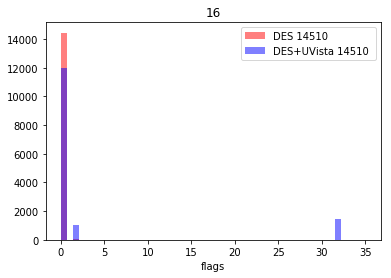

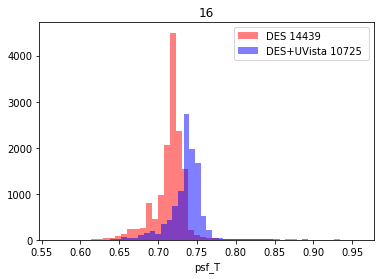

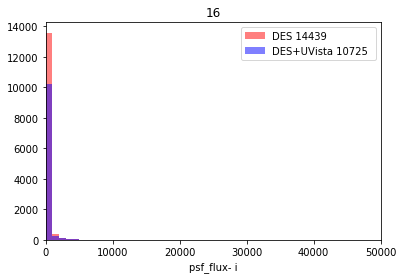

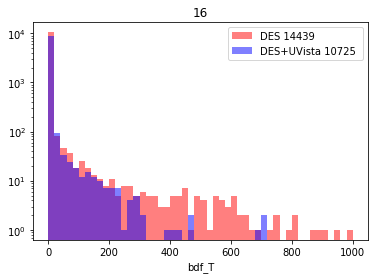

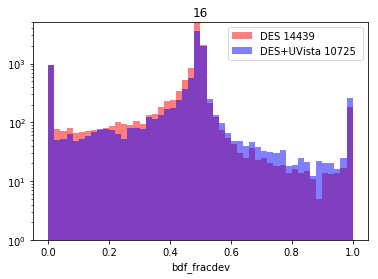

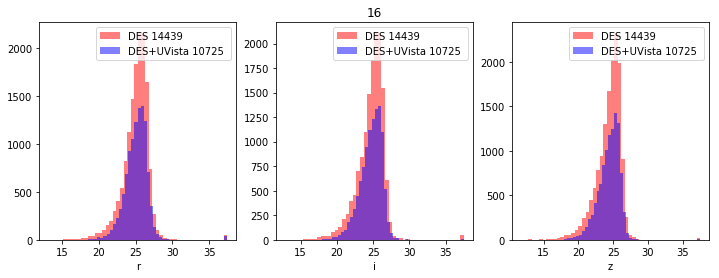

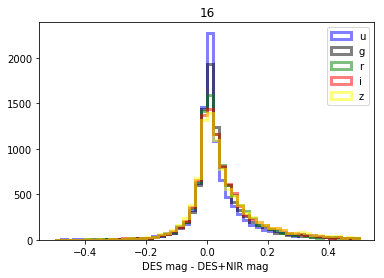

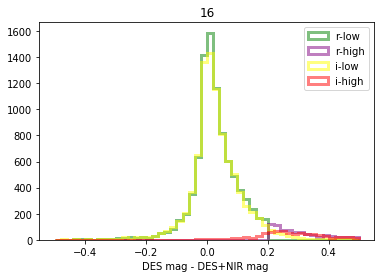

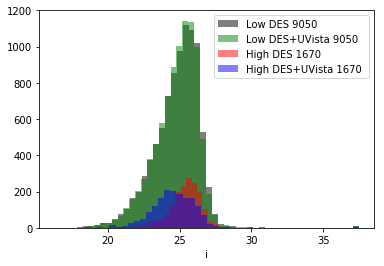

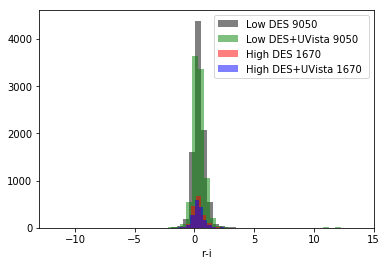

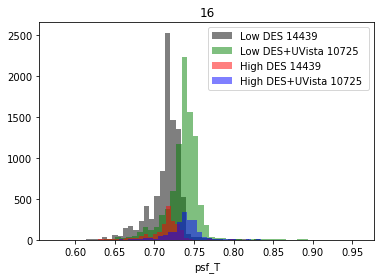

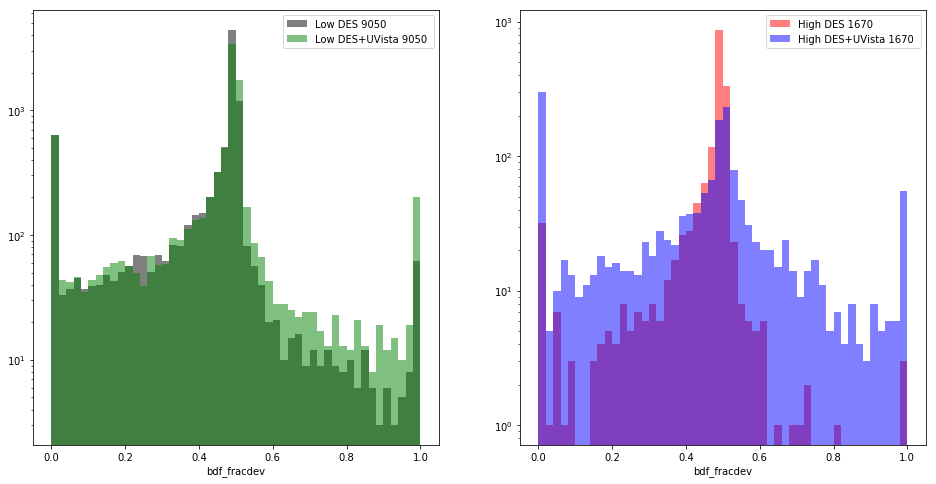

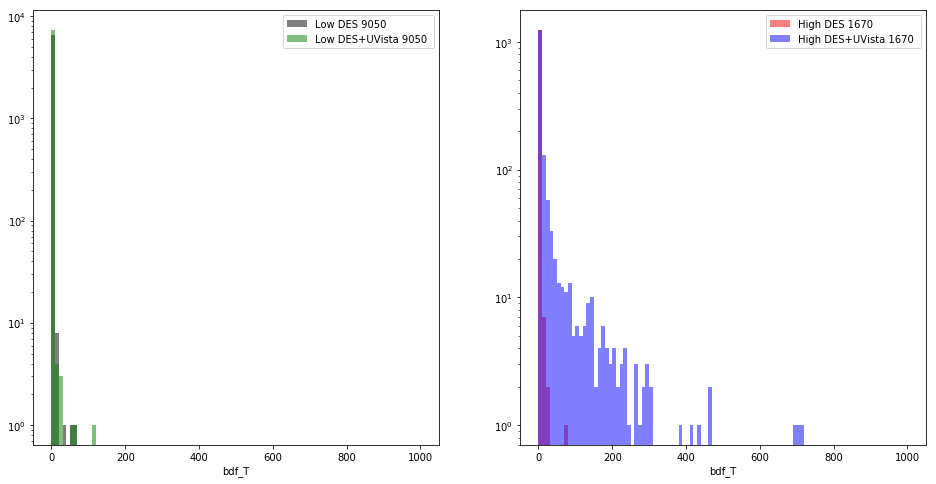

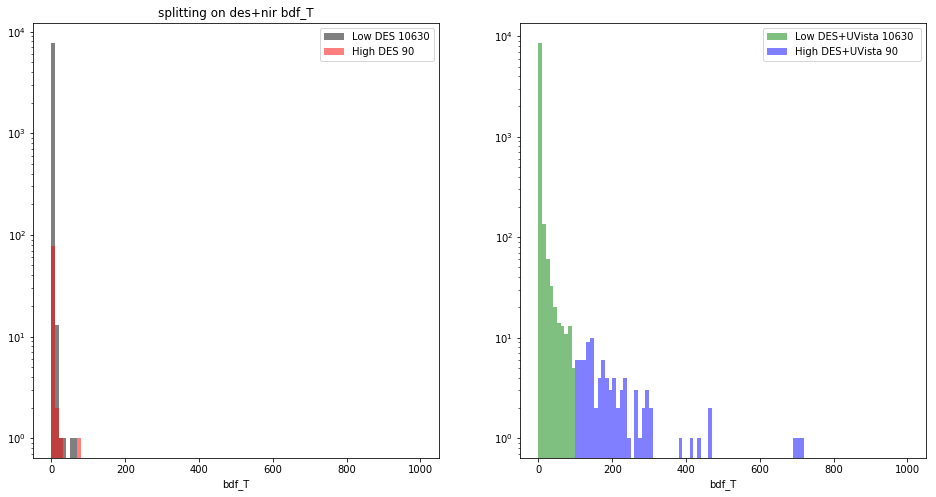

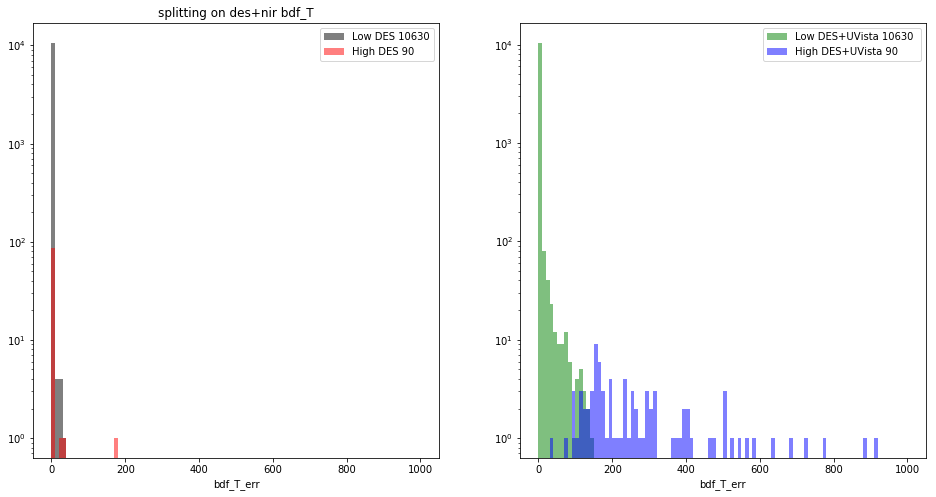

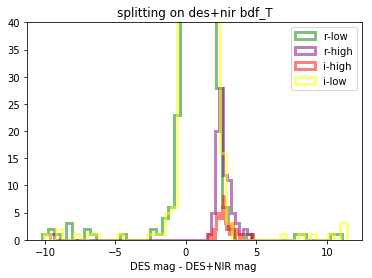

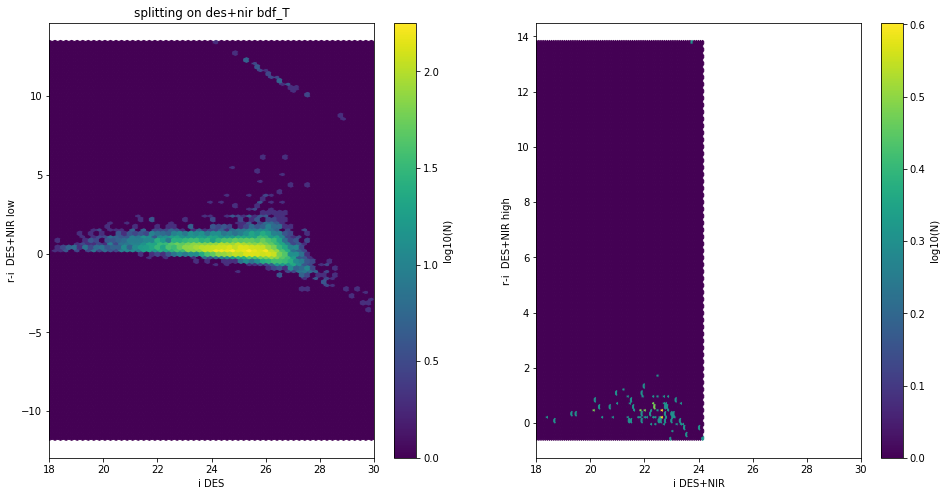

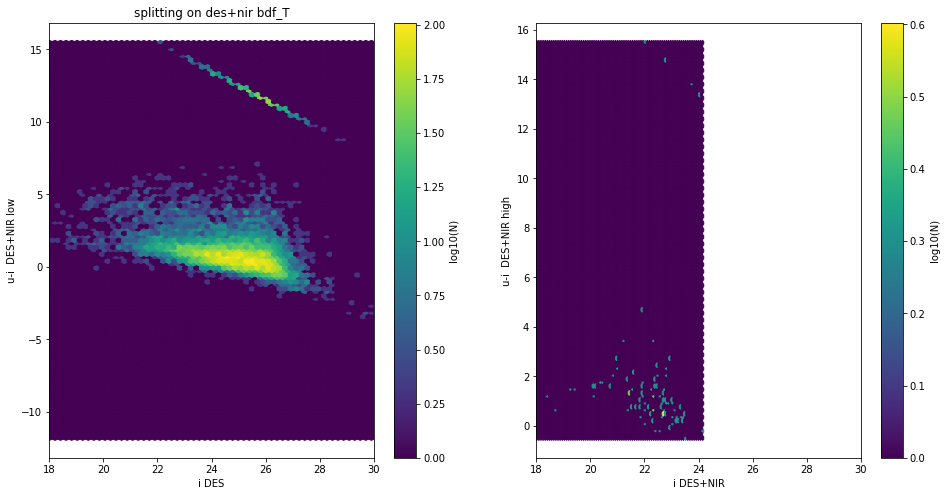

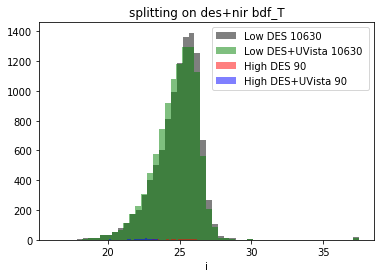

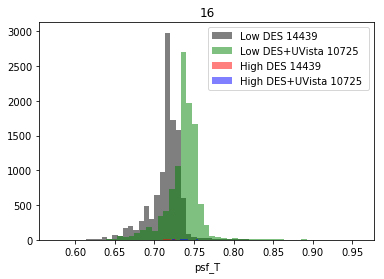

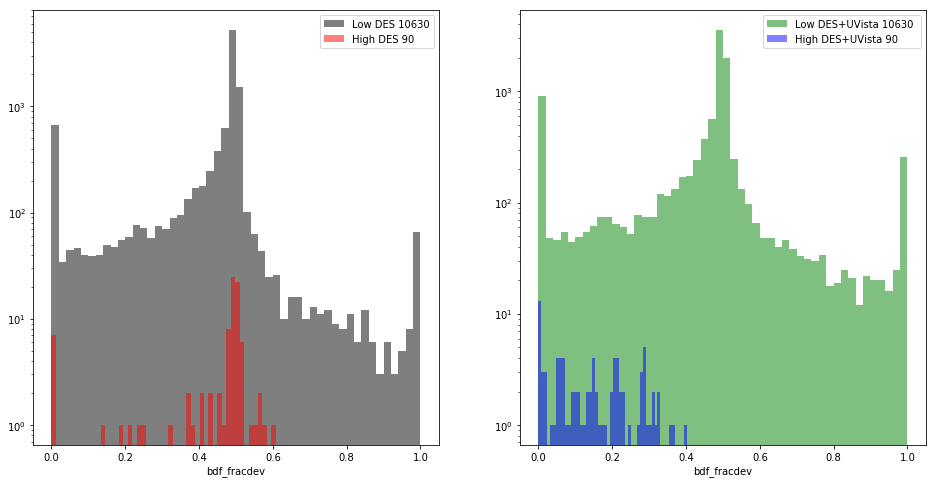

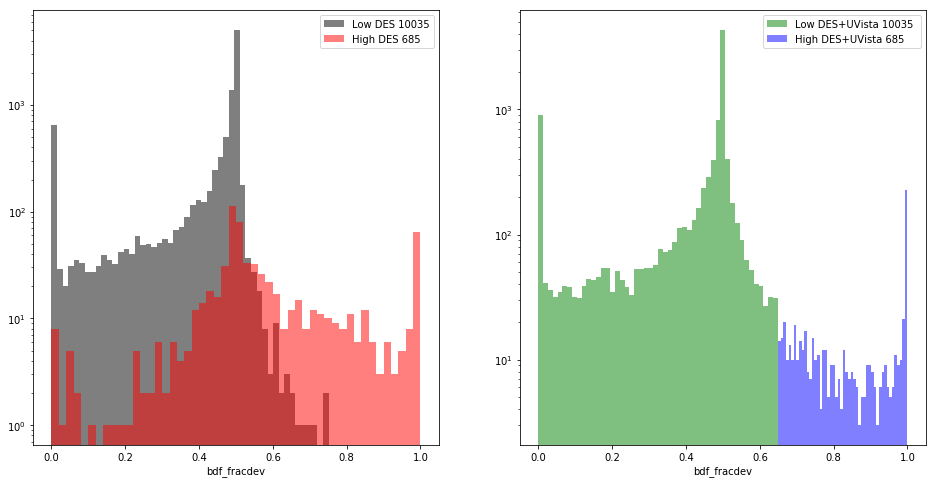

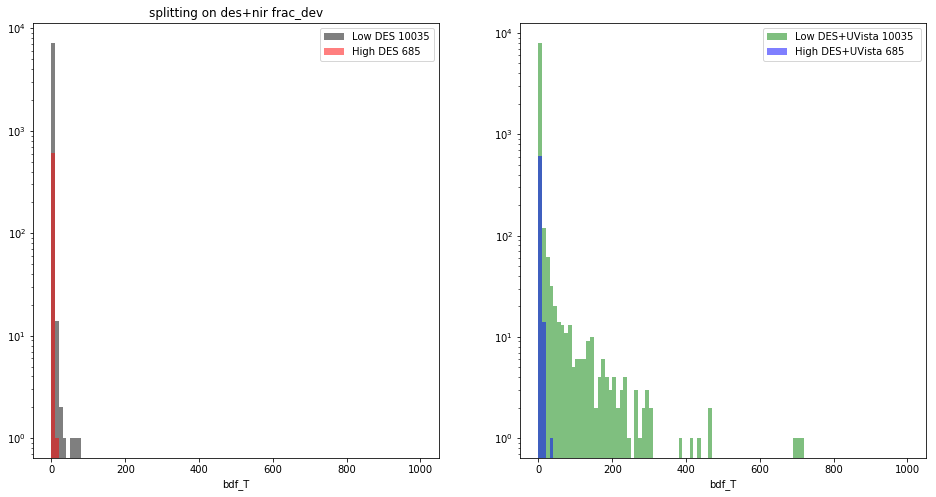

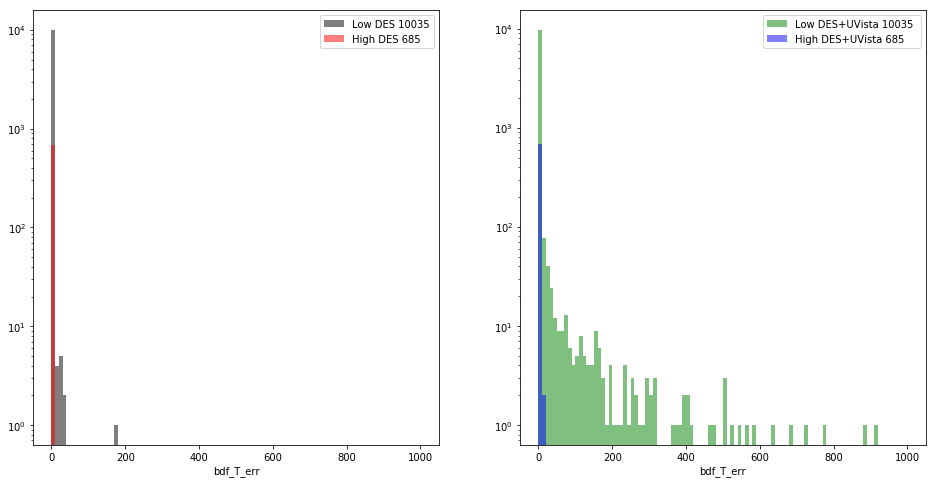

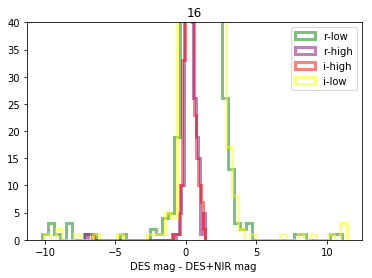

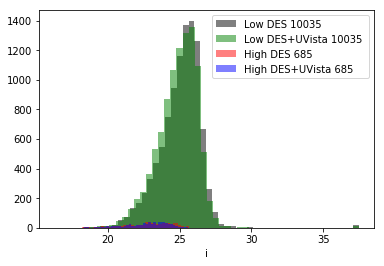

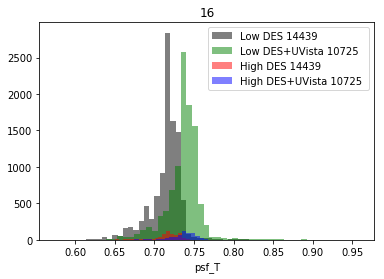

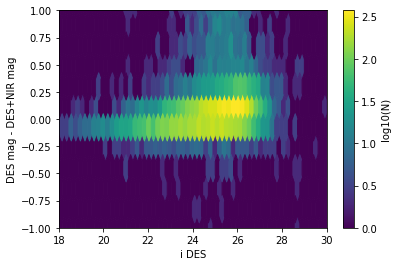

In [175]:
#COMPARE DES ONLY MOF V DES+IR MOF

chip="16"
print(chip)
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/run-dmask09low-COSMOS_C%s_r3764p01.fits' % chip #des cosmos C3
#file2='/global/cscratch1/sd/aamon/DEEP/MOFcats/run-uvd02-COSMOS_C%s_r3764p01.fits' %chip #des+UV cosmos C3

file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-desmof01-SN-C3_C%s_r3688p01.fits' % chip #des cosmos C3
file2='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-vd13-SN-C3_C%s_r3688p01.fits' %chip #des+UV cosmos C3


label="C3_DES_%s" % chip #_astromcorr "C_SOF"  #ugriz
data = fits.open(file) 
deep=Table(data[1].data)
cols = data[1].columns
print(cols)
print("num deep des galaxies :",len(deep))
print(deep['flags'])


label="C_UVDES_chip3" #_astromcorr "C_SOF"  #ugrizJHK
data2 = fits.open(file2) 
deep2=Table(data2[1].data)
cols = data2[1].columns
print(cols)
print(deep2['flags'])
print("num deep galaxies :",len(deep2))


#print(deep['bdf_mag'][:,3])
#print(deep2['bdf_mag'][:,3])

#print(deep['bdf_T'])
#print(deep2['bdf_T'])
##print(min(deep2['ra']),max(deep2['ra']))



fig, ax = plt.subplots()
plt.hist(deep['flags'],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50,range=(0,35))
plt.hist(deep2['flags'],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50,range=(0,35))
plt.legend()
plt.xlabel("flags")
plt.title(chip)

deep=deep[deep['flags']==0]
print("num deep des good galaxies :",len(deep))
deep2=deep2[deep2['flags']==0]
print("num deep des+uv good galaxies :",len(deep2))

#deep=deep[deep['mask_flags'] == 0 ]
#print("num deep des unmasked galaxies :",len(deep))
deep2=deep2[deep2['mask_flags'] ==0]
print("num deep des+uv unmasked galaxies :",len(deep2))


#CUT OUTLIERS OUT
#for i in range (0,5):
#    deep=deep[deep['bdf_mag'][:,i]<37]
#    print("num deep des good galaxies :",len(deep))
#    deep2=deep2[deep2['bdf_mag'][:,i]<37]
#    print("num deep des+uv good alaxies :",len(deep2))

fig, ax = plt.subplots()
plt.hist(deep['psf_T'],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50)
plt.hist(deep2['psf_T'],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("psf_T")
plt.title(chip)


fig, ax = plt.subplots()
plt.hist(deep['psf_flux'][:,3],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50,range=(0,50000))
plt.hist(deep2['psf_flux'][:,3],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50,range=(0,50000))
plt.xlim(0,50000)
plt.legend()
plt.xlabel("psf_flux- i")
plt.title(chip)

fig, ax = plt.subplots()
plt.hist(deep['bdf_T'],color='red',alpha=0.5,range=(0,1000),label="DES %s" % len(deep),bins=50)
plt.hist(deep2['bdf_T'],color='blue',alpha=0.5,range=(0,1000),label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("bdf_T")
plt.yscale('log')
plt.title(chip)

fig, ax = plt.subplots()
plt.hist(deep['bdf_fracdev'],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50) #range=(0,5),
plt.hist(deep2['bdf_fracdev'],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50) #range=(0,5),
plt.legend()
plt.xlabel("bdf_fracdev")
plt.title(chip)
plt.ylim(1,5000)
plt.yscale('log')

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].hist(deep['bdf_mag'][:,2],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50) #range=(15,40),
ax[0].hist(deep2['bdf_mag'][:,2],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50) #range=(15,40),
ax[0].legend()
ax[0].set_xlabel("r")

ax[1].hist(deep['bdf_mag'][:,3],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50) #range=(15,40),
ax[1].hist(deep2['bdf_mag'][:,3],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50) #range=(15,40),
ax[1].legend()
ax[1].set_xlabel("i")
ax[1].set_title(chip)

ax[2].hist(deep['bdf_mag'][:,4],color='red',alpha=0.5,label="DES %s" % len(deep),bins=50) #range=(15,40),
ax[2].hist(deep2['bdf_mag'][:,4],color='blue',alpha=0.5,label="DES+UVista %s " %len(deep2),bins=50) #range=(15,40),
ax[2].legend()
ax[2].set_xlabel("z")

match=join(deep,deep2, keys='id')
print(match)

fig, ax = plt.subplots()
plt.hist(match['bdf_mag_1'][:,0]-match['bdf_mag_2'][:,0],color='blue',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='u',linewidth=3,bins=50)
plt.hist(match['bdf_mag_1'][:,1]-match['bdf_mag_2'][:,1],color='black',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='g',linewidth=3,bins=50)
plt.hist(match['bdf_mag_1'][:,2]-match['bdf_mag_2'][:,2],color='green',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='r',linewidth=3,bins=50)
plt.hist(match['bdf_mag_1'][:,3]-match['bdf_mag_2'][:,3],color='red',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='i',linewidth=3,bins=50)#,label="DES %s" % len(deep2),bins=50)
plt.hist(match['bdf_mag_1'][:,4]-match['bdf_mag_2'][:,4],color='yellow',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='z',linewidth=3,bins=50)
#plt.hist(deep2['bdf_T'],color='blue',alpha=0.5,range=(15,40),label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("DES mag - DES+NIR mag ")
plt.title(chip)



#############PULL OUT SPIKE
"""

print("CHECKING THE SPIKE")
spike=match[np.where(diff==0)]


fig, ax = plt.subplots()
plt.hist(spike['bdf_mag_1'][:,0]-spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='u',linewidth=3,bins=50)
plt.legend()
plt.xlabel("DES mag - DES+NIR mag ")
plt.title(chip)

fig, ax = plt.subplots()
ax.hist(spike['bdf_mag_1'][:,0],color='red',alpha=0.5,label="DES %s" % len(spike),bins=50) #range=(15,40),
ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+UVista %s " %len(spike),bins=50) #range=(15,40),
ax.legend()
ax.set_xlabel("r")

fig, ax = plt.subplots()
plt.hist(spike['psf_T_1'],color='red',alpha=0.5,label="DES %s" % len(spike),bins=50)
plt.hist(spike['psf_T_2'],color='blue',alpha=0.5,label="DES+UVista %s " %len(spike),bins=50)
plt.legend()
plt.xlabel("psf_T")
plt.title(chip)

fig, ax = plt.subplots()
plt.hist(spike['bdf_T_1'],color='red',alpha=0.5,range=(0,5),label="DES %s" % len(spike),bins=50)
plt.hist(spike['bdf_T_2'],color='blue',alpha=0.5,range=(0,5),label="DES+UVista %s " %len(spike),bins=50)
plt.legend()
plt.xlabel("bdf_T")
plt.title(chip)
"""
print("CHECKING THE TWO HALVES")
###########################################
#CHECK TWO HALVES
diff=(match['bdf_mag_1'][:,2]-match['bdf_mag_2'][:,2])
low=match[np.where(diff<0.2)]
high=match[np.where(diff>0.2)]

fig, ax = plt.subplots()
##plt.hist(match['bdf_mag_1'][:,0]-match['bdf_mag_2'][:,0],color='blue',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='u',linewidth=3,bins=50)
#plt.hist(match['bdf_mag_1'][:,1]-match['bdf_mag_2'][:,1],color='black',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='g',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,2]-low['bdf_mag_2'][:,2],color='green',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='r-low',linewidth=3,bins=50)
plt.hist(high['bdf_mag_1'][:,2]-high['bdf_mag_2'][:,2],color='purple',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='r-high',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,3]-low['bdf_mag_2'][:,3],color='yellow',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='i-low',linewidth=3,bins=50)#,label="DES %s" % len(deep2),bins=50)
plt.hist(high['bdf_mag_1'][:,3]-high['bdf_mag_2'][:,3],color='red',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='i-high',linewidth=3,bins=50)
#plt.hist(match['bdf_mag_1'][:,4]-match['bdf_mag_2'][:,4],color='yellow',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='z',linewidth=3,bins=50)
#plt.hist(deep2['bdf_T'],color='blue',alpha=0.5,range=(15,40),label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("DES mag - DES+NIR mag ")
plt.title(chip)

fig, ax = plt.subplots( )
ax.hist(low['bdf_mag_1'][:,3],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax.hist(low['bdf_mag_2'][:,3],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax.hist(high['bdf_mag_1'][:,3],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax.hist(high['bdf_mag_2'][:,3],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)


ax.legend()
ax.set_xlabel("i")



fig, ax = plt.subplots( )
ax.hist(low['bdf_mag_1'][:,2]-low['bdf_mag_1'][:,3],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax.hist(low['bdf_mag_2'][:,2]-low['bdf_mag_2'][:,3],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax.hist(high['bdf_mag_1'][:,2]-high['bdf_mag_1'][:,3],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax.hist(high['bdf_mag_2'][:,2]-high['bdf_mag_2'][:,3],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)

ax.legend()
ax.set_xlabel("r-i")

fig, ax = plt.subplots()
plt.hist(low['psf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(deep),bins=50)
plt.hist(low['psf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(deep2),bins=50)
plt.hist(high['psf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(deep),bins=50)
plt.hist(high['psf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(deep2),bins=50)


plt.legend()
plt.xlabel("psf_T")
plt.title(chip)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_fracdev_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax[0].hist(low['bdf_fracdev_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax[1].hist(high['bdf_fracdev_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax[1].hist(high['bdf_fracdev_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("bdf_fracdev")
ax[1].set_xlabel("bdf_fracdev")
#ax[0].set_xlim(0,5000)
#ax[1].set_xlim(0,5000)
#fig, ax = plt.subplots()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=100,range=(0,1000) )
ax[0].hist(low['bdf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=100,range=(0,1000)) #range=(15,40)
ax[1].hist(high['bdf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=100,range=(0,1000)) #range=(15,40),
ax[1].hist(high['bdf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=100,range=(0,1000)) #range=(15,40)


ax[0].legend()
ax[1].legend()

ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel("bdf_T")
ax[1].set_xlabel("bdf_T")
print("bdf_T")
print(max(low['bdf_T_1']))
print(max(low['bdf_T_2']))
print(max(high['bdf_T_1']))
print(max(high['bdf_T_2']))

###########################################
print("split bdfT")
#CHECK TWO HALVES
#diff=(match['bdf_T_1']-match['bdf_mag_2'][:,2])
low=match[np.where(match['bdf_T_2']<100)]
high=match[np.where(match['bdf_T_2']>100)]
          
print(len(low))
print(len(high))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=100,range=(0,1000) )
ax[1].hist(low['bdf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=100,range=(0,1000)) #range=(15,40)
ax[0].hist(high['bdf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=100,range=(0,1000)) #range=(15,40),
ax[1].hist(high['bdf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=100,range=(0,1000)) #range=(15,40)


ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel("bdf_T")
ax[1].set_xlabel("bdf_T")
ax[0].set_title("splitting on des+nir bdf_T")
print("bdf_T")


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_T_err_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=100,range=(0,1000) )
ax[1].hist(low['bdf_T_err_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=100,range=(0,1000)) #range=(15,40)
ax[0].hist(high['bdf_T_err_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=100,range=(0,1000)) #range=(15,40),
ax[1].hist(high['bdf_T_err_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=100,range=(0,1000)) #range=(15,40)

ax[0].legend()
ax[1].legend()

ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel("bdf_T_err")
ax[1].set_xlabel("bdf_T_err")
ax[0].set_title("splitting on des+nir bdf_T")



fig, ax = plt.subplots()
##plt.hist(match['bdf_mag_1'][:,0]-match['bdf_mag_2'][:,0],color='blue',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='u',linewidth=3,bins=50)
#plt.hist(match['bdf_mag_1'][:,1]-match['bdf_mag_2'][:,1],color='black',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='g',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,2]-low['bdf_mag_2'][:,2],color='green',alpha=0.5,histtype ='step',label='r-low',linewidth=3,bins=50)
plt.hist(high['bdf_mag_1'][:,2]-high['bdf_mag_2'][:,2],color='purple',alpha=0.5,histtype ='step',label='r-high',linewidth=3,bins=50)#plt.hist(low['bdf_mag_1'][:,3]-low['bdf_mag_2'][:,3],color='yellow',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='i-low',linewidth=3,bins=50)#,label="DES %s" % len(deep2),bins=50)
plt.hist(high['bdf_mag_1'][:,3]-high['bdf_mag_2'][:,3],color='red',alpha=0.5,histtype ='step',label='i-high',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,3]-low['bdf_mag_2'][:,3],color='yellow',alpha=0.5,histtype ='step',label='i-low',linewidth=3,bins=50)
#plt.hist(deep2['bdf_T'],color='blue',alpha=0.5,range=(15,40),label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("DES mag - DES+NIR mag ")
plt.ylim(0,40)
plt.title(chip)
plt.title("splitting on des+nir bdf_T")


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
hb=ax[0].hexbin(low['bdf_mag_2'][:,3], low['bdf_mag_2'][:,2]-low['bdf_mag_2'][:,3], label="DES %s" % len(low), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+UVista %s " %len(spike),bins=50) #range=(15,40),
ax[0].set_xlabel("i DES")
ax[0].set_ylabel("r-i  DES+NIR low")
#ax[0].set_ylim(-1.,1.)
ax[0].set_xlim(18.,30)
cb = fig.colorbar(hb, ax=ax[0])
cb.set_label('log10(N)')

hb=ax[1].hexbin(high['bdf_mag_2'][:,3], high['bdf_mag_2'][:,2]-high['bdf_mag_2'][:,3], label="DES %s" % len(high), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+Usta %s " %len(spike),bins=50) #range=(15,40),
ax[1].set_xlabel("i DES+NIR")
ax[1].set_ylabel("r-i  DES+NIR high" )
#ax[0].set_ylim(-1.,1.)
ax[1].set_xlim(18.,30)
cb = fig.colorbar(hb, ax=ax[1])
cb.set_label('log10(N)')
ax[0].set_title("splitting on des+nir bdf_T")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
hb=ax[0].hexbin(low['bdf_mag_2'][:,3], low['bdf_mag_2'][:,0]-low['bdf_mag_2'][:,3], label="DES %s" % len(low), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,la0el="DES+UVista %s " %len(spike),bins=50) #range=(15,40),
ax[0].set_xlabel("i DES")
ax[0].set_ylabel("u-i  DES+NIR low")
#ax[0].set_ylim(-1.,1.)
ax[0].set_xlim(18.,30)
cb = fig.colorbar(hb, ax=ax[0])
cb.set_label('log10(N)')

hb=ax[1].hexbin(high['bdf_mag_2'][:,3], high['bdf_mag_2'][:,0]-high['bdf_mag_2'][:,3], label="DES %s" % len(high), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+Usta %s " %len(spike),bins=50) #range=(15,40),
ax[1].set_xlabel("i DES+NIR")
ax[1].set_ylabel("u-i  DES+NIR high" )
#ax[0].set_ylim(-1.,1.)
ax[1].set_xlim(18.,30)
cb = fig.colorbar(hb, ax=ax[1])
cb.set_label('log10(N)')
ax[0].set_title("splitting on des+nir bdf_T")


###############

fig, ax = plt.subplots( )
ax.hist(low['bdf_mag_1'][:,3],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax.hist(low['bdf_mag_2'][:,3],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax.hist(high['bdf_mag_1'][:,3],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax.hist(high['bdf_mag_2'][:,3],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)

ax.set_title("splitting on des+nir bdf_T")
ax.legend()
ax.set_xlabel("i")


fig, ax = plt.subplots()
plt.hist(low['psf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(deep),bins=50)
plt.hist(low['psf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(deep2),bins=50)
plt.hist(high['psf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(deep),bins=50)
plt.hist(high['psf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(deep2),bins=50)


plt.legend()
plt.xlabel("psf_T")
plt.title(chip)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_fracdev_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax[1].hist(low['bdf_fracdev_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax[0].hist(high['bdf_fracdev_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax[1].hist(high['bdf_fracdev_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("bdf_fracdev")
ax[1].set_xlabel("bdf_fracdev")
#ax[0].set_xlim(0,5000)
#ax[1].set_xlim(0,5000)
#fig, ax = plt.subplots()
###########################################
print("split bdf_fracdec")
#CHECK TWO HALVES
#diff=(match['bdf_T_1']-match['bdf_mag_2'][:,2])
low=match[np.where(match['bdf_fracdev_2']<0.65)]
high=match[np.where(match['bdf_fracdev_2']>0.65)]
          
print(len(low))
print(len(high))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_fracdev_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax[1].hist(low['bdf_fracdev_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax[0].hist(high['bdf_fracdev_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax[1].hist(high['bdf_fracdev_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].legend()
ax[1].legend()
ax[0].set_xlabel("bdf_fracdev")
ax[1].set_xlabel("bdf_fracdev")
#ax[0].set_xlim(0,5000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=100,range=(0,1000) )
ax[1].hist(low['bdf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=100,range=(0,1000)) #range=(15,40)
ax[0].hist(high['bdf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=100,range=(0,1000)) #range=(15,40),
ax[1].hist(high['bdf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=100,range=(0,1000)) #range=(15,40)


ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel("bdf_T")
ax[1].set_xlabel("bdf_T")
ax[0].set_title("splitting on des+nir frac_dev")
print("bdf_T")


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
ax[0].hist(low['bdf_T_err_1'],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=100,range=(0,1000) )
ax[1].hist(low['bdf_T_err_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=100,range=(0,1000)) #range=(15,40)
ax[0].hist(high['bdf_T_err_1'],color='red',alpha=0.5,label="High DES %s" % len(high),bins=100,range=(0,1000)) #range=(15,40),
ax[1].hist(high['bdf_T_err_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=100,range=(0,1000)) #range=(15,40)

ax[0].legend()
ax[1].legend()

ax[1].set_yscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel("bdf_T_err")
ax[1].set_xlabel("bdf_T_err")



fig, ax = plt.subplots()
##plt.hist(match['bdf_mag_1'][:,0]-match['bdf_mag_2'][:,0],color='blue',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='u',linewidth=3,bins=50)
#plt.hist(match['bdf_mag_1'][:,1]-match['bdf_mag_2'][:,1],color='black',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='g',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,2]-low['bdf_mag_2'][:,2],color='green',alpha=0.5,histtype ='step',label='r-low',linewidth=3,bins=50)
plt.hist(high['bdf_mag_1'][:,2]-high['bdf_mag_2'][:,2],color='purple',alpha=0.5,histtype ='step',label='r-high',linewidth=3,bins=50)#plt.hist(low['bdf_mag_1'][:,3]-low['bdf_mag_2'][:,3],color='yellow',alpha=0.5,range=(-0.5,0.5),histtype ='step',label='i-low',linewidth=3,bins=50)#,label="DES %s" % len(deep2),bins=50)
plt.hist(high['bdf_mag_1'][:,3]-high['bdf_mag_2'][:,3],color='red',alpha=0.5,histtype ='step',label='i-high',linewidth=3,bins=50)
plt.hist(low['bdf_mag_1'][:,3]-low['bdf_mag_2'][:,3],color='yellow',alpha=0.5,histtype ='step',label='i-low',linewidth=3,bins=50)
#plt.hist(deep2['bdf_T'],color='blue',alpha=0.5,range=(15,40),label="DES+UVista %s " %len(deep2),bins=50)
plt.legend()
plt.xlabel("DES mag - DES+NIR mag ")
plt.ylim(0,40)
plt.title(chip)

fig, ax = plt.subplots( )
ax.hist(low['bdf_mag_1'][:,3],color='black',alpha=0.5,label="Low DES %s" % len(low),bins=50) #range=(15,40),
ax.hist(low['bdf_mag_2'][:,3],color='green',alpha=0.5,label="Low DES+UVista %s " %len(low),bins=50) #range=(15,40)
ax.hist(high['bdf_mag_1'][:,3],color='red',alpha=0.5,label="High DES %s" % len(high),bins=50) #range=(15,40),
ax.hist(high['bdf_mag_2'][:,3],color='blue',alpha=0.5,label="High DES+UVista %s " %len(high),bins=50) #range=(15,40)


ax.legend()
ax.set_xlabel("i")


fig, ax = plt.subplots()
plt.hist(low['psf_T_1'],color='black',alpha=0.5,label="Low DES %s" % len(deep),bins=50)
plt.hist(low['psf_T_2'],color='green',alpha=0.5,label="Low DES+UVista %s " %len(deep2),bins=50)
plt.hist(high['psf_T_1'],color='red',alpha=0.5,label="High DES %s" % len(deep),bins=50)
plt.hist(high['psf_T_2'],color='blue',alpha=0.5,label="High DES+UVista %s " %len(deep2),bins=50)


plt.legend()
plt.xlabel("psf_T")
plt.title(chip)


#ax[1].set_xlim(0,5000)
#fig, ax = plt.subplots()



###########################################
fig, ax = plt.subplots()
hb=ax.hexbin(match['bdf_mag_1'][:,3], match['bdf_mag_1'][:,3]-match['bdf_mag_2'][:,3], label="DES %s" % len(match), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+UVista %s " %len(spike),bins=50) #range=(15,40),
ax.set_xlabel("i DES")
ax.set_ylabel("DES mag - DES+NIR mag" )
ax.set_ylim(-1.,1.)
ax.set_xlim(18.,30)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')


"""
fig, ax = plt.subplots()
ax.hexbin(spike['bdf_mag_2'][:,0], spike['bdf_mag_2'][:,2]-spike['bdf_mag_2'][:,0],label="DES %s" % len(spike), bins='log' ) #range=(15,40),
#ax.hist(spike['bdf_mag_2'][:,0],color='blue',alpha=0.5,label="DES+UVista %s " %len(spike),bins=50) #range=(15,40),
ax.set_ylabel("u DES+NIR")
ax.set_ylabel("u-r DES+NIR")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')"""

"""
match = pd.merge(DES,DESIR, left_on='id', right_on='id', how='inner')
print(len(match))


bands = 'ugrizYJHK'
simple_cols = ['id', 'ra', 'dec', 'flags',] #'bdf_T']

mags = ['bdf_mag_dered_' + band for band in bands]
magerrs = ['bdf_mag_err_dered_' + band for band in bands]

fluxes = [_.replace('mag','flux') for _ in mags]
fluxerrs = [_.replace('mag','flux') for _ in magerrs]
#deep_all_columns = simple_cols + deep_flux_columns + deep_flux_err_columns

#cosmos_z = fits.open(deep_fields_files[0])[1].data # redshift #moved to later

cosmos = fits.open(deep_fields_files[1])[1].data # deep
cosmos = pd.DataFrame({col.upper() : col_vals for col, col_vals in zip(simple_cols + fluxes + fluxerrs + mags,
                                                           [cosmos[_].byteswap().newbyteorder() for _ in simple_cols] + \
                                                           [cosmos[_[:-2]][:,i].byteswap().newbyteorder() for i,_ in enumerate(fluxes)] + \
                                                           [cosmos[_[:-2]][:,i].byteswap().newbyteorder() for i,_ in enumerate(fluxerrs)] + \
                                                           [cosmos[_[:-2]][:,i].byteswap().newbyteorder() for i,_ in enumerate(mags)])})
                                                           """

#### 

In [ ]:
#READ IN DEEP CATALOGUE
#read in Erin's catalogue
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-vd03-SN-C3_C01_r3688p01.fits' #c3 9band
#file='/global/project/projectdirs/des/y3-image-sims/deep_data/run-d02-SN-C3_all_r3688p01.fits' #c3grizonly 
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-vd03-SN-C3_trim_extcorr.fits' #c3 9band dered 
#c3grizonlydered
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-d03-SN-C3_ebv_extcorr.fits' #c3grizonlydered
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-vd09-SN-C3_trim_extcorr.fits' #c39banddered - astrometrydix
file='/global/cscratch1/sd/aamon/DEEP/MOFcats/SN-C3/run-vd10-SN-C3_trim.fits' #MOF fix C3
file='/global/homes/w/will_h/run-vd10-SN-C3_r3688p01_trim_extcorr.fits' #MOF fix dered C3
file='/global/homes/w/will_h/run-vd10-SN-X3_r3688p01_trim_extcorr.fits' #MOF fix dered X3
#file='/global/cscratch1/sd/aamon/DEEP/MOFcats/run-cosmos-sof01-COSMOS-masked_trim_extcorr.fits' #COSMOS

label="X39band_dered_MOFfix" #_astromcorr "C_SOF"  #
data = fits.open(file) 
data.info() 
print(data.info)
deep=Table(data[1].data)
cols = data[1].columns
print(cols)
deep['bdf_mag_dered'][:,0]
#allmofs = []
#for i in np.arange(62):
#    fname = "/global/homes/a/aamon/DES/DEStests/DEEP/MOFcats/SN-C3/d03/run-d03-SN-C3_C{:02d}_r3688p01.fits".format(i+1) #c3 griz only- updated blending
#    try:
#        allmofs.append(fitsio.read(fname))
#    except:
#        pass
#deep = np.hstack(allmofs)
#print(deep.dtype)
print(min(deep['ra']),max(deep['ra']))
#deep=Table(allmofs)
#cols = allmofs[1].columns
############MAKE CUTS ON CAT
print("num deep galaxies :",len(deep))
deep=deep[deep['flags']==0]
print(deep['bdf_mag_dered'][:,3])
#deep=deep[deep['bdf_s2n']>10]
#and a rough bright star-galaxy separation (removing bdf_s2n>80 and bdf_T<0 objects*************
#deep=deep[deep['bdf_s2n']<80]
#deep=deep[deep['bdf_T']<0]
print(min(deep['ra']),max(deep['ra']))
print("num deep good galaxies :",len(deep))
#deep=deep[deep['bdf_mag']<26] #############maybe should be 25.5 given Niall's imsim plots*******
#flags=0, bdf_s2n>10, mag_i<24.5, and a rough bright star-galaxy separation (removing bdf_s2n>80 and bdf_T<0 objects
#deep=deep[deep['ra']>50]
#print("num deep good galaxies :",len(deep))
plt.hist(deep['bdf_mag_dered'][:,3])

In [ ]:
#READ IN GOLD
catname = '/global/cscratch1/sd/troxel/cats_des_y3/Y3_mastercat_v2_6_20_18.h5'

f = h.File(catname,'r')
print(f['catalog'].keys())
print(f['catalog/gold'].keys())
print(f['catalog/gold/coadd_object_id'])


ra = np.array(f['catalog/gold/ra'])#[star_mask] 
dec = np.array(f['catalog/gold/dec'])#[star_mask]
gflag = np.array(f['catalog/gold/flags_gold'])
badflag =  np.array(f['catalog/gold/flags_badregions'])
print(len(ra))

zeropt=30
g = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_g']))#[star_mask]
r = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_r']))#[star_mask]
i = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_i']))#[star_mask]
z = zeropt- 2.5*np.log10(np.array(f['catalog/gold/sof_cm_flux_corrected_z']))#[star_mask]

plt.scatter(i , np.array(f['catalog/gold/sof_cm_mag_corrected_i']))
"""cosmosonly=np.where(  (ra<max(deep['ra'])) & (ra>min(deep['ra']))
               &  (dec<max(deep['dec'])) & (dec>min(deep['dec']))   )
i=i[cosmosonly]
z=z[cosmosonly]
r=r[cosmosonly]
print(len(r))"""

"""
ra=ra[np.where((i<30) & (i>0))]
dec=dec[np.where((i<30)& (i>0))]
z=z[np.where((i<30)& (i>0))]
r=r[np.where((i<30)& (i>0))]
i=i[np.where((i<30)& (i>0))]
g=g[np.where((i<30)& (i>0))]
print(len(ra))
"""
ra[ra > 180] -= 360

#cutting out only galaxies
#If you are using MOF quantities, (FLAGS_GOLD & 1111001) = 0; and (FLAGS_BADREGIONS & 10) = 0
ra=ra[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
dec=dec[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
g=g[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
r=r[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
i=i[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
z=z[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]

gold=np.column_stack((ra,dec,g,r,i,z))
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldg=gold[:,2]
goldr=gold[:,3]
goldi=gold[:,4]
goldz=gold[:,5]


In [ ]:
#FLAGS_GOLD  If you are using SExtractor quantities, you should add (FLAGS_GOLD & 1111000) = 0 (which means it can be either 0,1,2 or 3) ; and (FLAGS_BADREGIONS & 01) = 0

file="/global/cscratch1/sd/aamon/COSMOS_r3756p02_r_cat.fits"
data = fits.open(file) 
data.info() 
print(data.info)
gold=Table(data[1].data)
cols = data[1].columns
#print(cols)
print(len(gold))

goldr= gold['MAG_AUTO']
modelr=gold['MAG_MODEL']

file="/global/cscratch1/sd/aamon/COSMOS_r3756p02_i_cat.fits"
data = fits.open(file) 
data.info() 
print(data.info)
gold=Table(data[1].data)
cols = data[1].columns
print(cols)

goldra = gold['ALPHAWIN_J2000']
golddec= gold['DELTAWIN_J2000']
#gflag = np.array(f['catalog/gold/flags_gold'])
#badflag =  np.array(f['catalog/gold/flags_badregions'])
print(len(goldra))

goldi= gold['MAG_AUTO']
modeli=gold['MAG_MODEL']


#plt.scatter(deep['ra'],deep['dec'],color='blue', alpha=0.1)
#plt.scatter(ra,dec, color='red', alpha=0.1)


"""ra[ra > 180] -= 360

#cutting out only galaxies
#If you are using MOF quantities, (FLAGS_GOLD & 1111001) = 0; and (FLAGS_BADREGIONS & 10) = 0
ra=ra[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
dec=dec[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
g=g[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
r=r[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
i=i[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]
z=z[np.where((gflag==0) | (gflag==2) | (gflag==4) | (gflag==6))]

gold=np.column_stack((ra,dec,g,r,i,z))
print(len(gold))
goldra=gold[:,0]
golddec=gold[:,1]
goldg=gold[:,2]
goldr=gold[:,3]
goldi=gold[:,4]
goldz=gold[:,5]"""
#print(gold['MAG_APER'])
#plt.hist(gold['MAG_APER'], 50, color='red')
plt.hist(gold['MAG_AUTO'], 50, range=(0,30),color='blue',alpha=0.5)
plt.hist(gold['MAG_MODEL'], 50, range=(0,30),color='green',alpha=0.5)
plt.show()

In [ ]:
#print(deep['bdf_mag_dered'][:,2]) #u gri z YJHKs
print(deep['bdf_mag'][:,2]) 
#print(len(deep['mag_auto']))

#ASSUMING MAGS ARE UGRI Z YJHKS
deepra=deep['ra']
deepdec=deep['dec']
#deepu=deep['bdf_mag'][:,0]
""" #for fourband, not dered
deepg=deep['bdf_mag'][:,0] #_dered
deepr=deep['bdf_mag'][:,1]
deepi=deep['bdf_mag'][:,2]
deepz=deep['bdf_mag'][:,3]

#for 9band- not dered
deepg=deep['bdf_mag'][:,1]
deepr=deep['bdf_mag'][:,2]
deepi=deep['bdf_mag'][:,3]
deepz=deep['bdf_mag'][:,4]
"""
#for 9band- dered
deepg=deep['bdf_mag_dered'][:,1]
deepr=deep['bdf_mag_dered'][:,2]
deepi=deep['bdf_mag_dered'][:,3]
deepz=deep['bdf_mag_dered'][:,4]
"""

#for 4band- dered
deepg=deep['bdf_mag_dered'][:,0]
deepr=deep['bdf_mag_dered'][:,1]
deepi=deep['bdf_mag_dered'][:,2]
deepz=deep['bdf_mag_dered'][:,3]
"""
#SCALE CUTS
deepra=deepra[deepr>0]
deepdec=deepdec[deepr>0]
#deepu=deepu[deepr>0]
deepi=deepi[deepr>0]
deepg=deepg[deepr>0]
deepr=deepr[deepr>0]

print(len(deepra))
deepra=deepra[deepi>0]
deepdec=deepdec[deepi>0]
#deepu=deepu[deepi>0]
deepr=deepr[deepi>0]
deepg=deepg[deepi>0]
deepi=deepi[deepi>0]

deepra=deepra[deepg>0]
deepdec=deepdec[deepg>0]
#deepu=deepu[deepg>0]
deepr=deepr[deepg>0]
deepi=deepi[deepg>0]
deepg=deepg[deepg>0]

"""deepra=deepra[deepz>0]
deepdec=deepdec[deepz>0]
#deepu=deepu[deepz>0]
deepr=deepr[deepz>0]
deepi=deepi[deepz>0]
deepg=deepg[deepz>0]"""

"""deepra=deepra[deepu>0]
deepdec=deepdec[deepu>0]
deepr=deepr[deepu>0]
deepi=deepi[deepu>0]
deepg=deepg[deepu>0]
deepu=deepu[deepu>0]"""

print(len(deepra))

#print(deep['id'])
#print(deep['ra']


In [ ]:
#match galaxies by ra and dec

from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=deepra*u.degree, dec=deepdec*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])

In [ ]:
print(len(goldra)) 
print(len(deep['bdf_mag'])) 
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #20 is the max matching range in arcmin
plt.xlabel('d2d (arcsec)')
print(deepra[d2d.arcsecond < 10])

In [ ]:
matchlim=1
plt.scatter(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)],deepra[np.where(d2d.arcsecond < matchlim)], marker='.')
plt.xlabel('DEEP RA-GOLD RA')
plt.ylabel('DEEP RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(deepra[np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]) )
plt.xlim(min(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]),max(deepra[np.where(d2d.arcsecond < matchlim)]-goldra[idx][np.where(d2d.arcsecond < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(deepra),max(deepra))

In [ ]:
plt.scatter(deepra[np.where(d2d.arcsecond < matchlim)],deepdec[np.where(d2d.arcsecond < matchlim)], marker='.')
plt.xlabel('DEEP RA')
plt.ylabel('DEEP RA')


In [ ]:
matchlim=1

match=np.column_stack((goldg[idx][np.where(d2d.arcsecond < matchlim)], deepg[np.where(d2d.arcsecond < matchlim)],  
                       goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 
                       goldi[idx][np.where(d2d.arcsecond < matchlim)], deepi[np.where(d2d.arcsecond < matchlim)], 
                       goldz[idx][np.where(d2d.arcsecond < matchlim)], deepz[np.where(d2d.arcsecond < matchlim)],
                       goldra[idx][np.where(d2d.arcsecond < matchlim)], deepra[np.where(d2d.arcsecond < matchlim)],
                       golddec[idx][np.where(d2d.arcsecond < matchlim)], deepdec[np.where(d2d.arcsecond < matchlim)],                       
                       deep['bdf_fracdev'][np.where(d2d.arcsecond < matchlim)]))


print("percentage matched: ", float(len(deepi[np.where(d2d.arcsecond < matchlim)]))/float(len(deepi))*100.)
print(np.shape(match))

#want a histogram of magnitudes in the matched sample and overall gold and overall deep

fig, ax = plt.subplots()
plt.hist(match[:,4], 50, range=(0, 20)) #20 is the max matching range in arcmin
plt.xlabel('d2d (arcsec)')


#gold deep
#g 01
#r 23
#i 45
#z 67

#CUTS ON MGNITUDES
#gold < 22) & (deep < 22)  
maglim=30
match=match[np.where( (match[:,0] < maglim) & (match[:,1] < maglim) )]
print(np.shape(match))
match=match[np.where( (match[:,2] < 30))]  #& (match[:,3] < 22) )]
match=match[np.where( match[:,3] < 30)] #rdeep cut

print(np.shape(match))
match=match[np.where( (match[:,4] < maglim) & (match[:,5] < maglim) )]
print(np.shape(match))
match=match[np.where( (match[:,6] < maglim) & (match[:,7] < maglim) )]
print(np.shape(match))


"""
#CUTS ON MAGNITUDE SUMS
#GB: take the median mag difference of objects with 0.5*(gold+deep) < 22
#We don’t want selection or noise biases to bias the measurement of this offset, so we want to restrict to mags where both catalogs are complete.

magsumlim=60
rsum=  match[:,2]+match[:,3]
print(rsum)
match=match[np.where(rsum < magsumlim)]
rsum=rsum[np.where(rsum < magsumlim)]
print(rsum)
print(np.shape(match))
print(match[:,8])
print("***")
print(match[:,9])

gsum=  match[:,0]+match[:,1]
match=match[np.where(gsum < magsumlim)]
print(np.shape(match))

isum=  match[:,4]+match[:,5]
match=match[np.where(isum < magsumlim)]
print(np.shape(match))

zsum=  match[:,6]+match[:,7]
match=match[np.where(zsum < magsumlim)]
print(np.shape(match))
"""

goldiselect=match[:,4]
deepiselect=match[:,5]

goldgselect=match[:,0]
deepgselect=match[:,1]

goldrselect=match[:,2]
deeprselect=match[:,3]

goldzselect=match[:,6]
deepzselect=match[:,7]



print(deeprselect-goldrselect)
print(match[:,10])
fig, ax = plt.subplots()
hb=ax.hexbin(deeprselect-goldrselect, match[:,10], bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.xlim(-1.5,1.5)
plt.axhline(y=0, color='red')
plt.ylim(min(match[:,10]),max(match[:,10]))
plt.ylabel('bdf_fracdev')
plt.xlabel('DEEP r - GOLD r')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

fig, ax = plt.subplots()
hb=ax.hexbin(deeprselect, match[:,10], bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
#plt.xlim(-1.5,1.5)
plt.axhline(y=0, color='red')
plt.ylim(min(match[:,10]),max(match[:,10]))
plt.ylabel('bdf_fracdev')
plt.xlabel('DEEP r \\')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')


"""goldg=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
goldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
goldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(rsum < 44)]
print(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))
print(len(goldrselect))
print(rsum)

#usum=  goldu[idx][np.where(d2d.arcsecond < matchlim)] + deepu[np.where(d2d.arcsecond < matchlim)] 
#golduselect=goldu[idx][np.where(d2d.arcsecond < matchlim)][np.where(usum < 44)]
print(len(goldg))
gsum=  goldg[idx][np.where(d2d.arcsecond < matchlim)] + deepg[np.where(d2d.arcsecond < matchlim)] 
goldgselect=goldg[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldi=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldz=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(gsum < 44)]
goldrselect=goldrselect[np.where(gsum < 44)]
print(len(goldgselect))

isum=  goldi[idx][np.where(d2d.arcsecond < matchlim)] + deepi[np.where(d2d.arcsecond < matchlim)] 
goldiselect=goldi[idx][np.where(d2d.arcsecond < matchlim)][np.where(isum < 44)]
print(len(goldiselect))

zsum=  goldz[idx][np.where(d2d.arcsecond < matchlim)] + deepz[np.where(d2d.arcsecond < matchlim)] 
goldzselect=goldz[idx][np.where(d2d.arcsecond < matchlim)][np.where(zsum < 44)]
print(len(goldzselect))"""

In [ ]:
#FOR UVISTA
matchlim=1

flags=gold['FLAGS'][idx][np.where(d2d.arcsecond < matchlim)]
print(flags)

match=np.column_stack((goldi[idx][np.where(d2d.arcsecond < matchlim)], deepi[np.where(d2d.arcsecond < matchlim)], 
                       goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 
                       goldra[idx][np.where(d2d.arcsecond < matchlim)], deepra[np.where(d2d.arcsecond < matchlim)],
                       golddec[idx][np.where(d2d.arcsecond < matchlim)], deepdec[np.where(d2d.arcsecond < matchlim)],                       
                       deep['bdf_fracdev'][np.where(d2d.arcsecond < matchlim)]))


print("percentage matched: ", float(len(deepi[np.where(d2d.arcsecond < matchlim)]))/float(len(deepi))*100.)
print("num matches before cuts: ", np.shape(match))

#plt.scatter(match[:,3] ,match[:,5] ,color='blue')
#plt.scatter(match[:,2] ,match[:,4] , color='red', s=1)


#want a histogram of magnitudes in the matched sample and overall gold and overall deep

#fig, ax = plt.subplots()
#plt.hist(match[:,1], 50, range=(0, 20)) #20 is the max matching range in arcmin
#plt.xlabel('d2d (arcsec)')


#gold deep
#g 01
#r 23
#i 45
#z 67

#CUTS ON MGNITUDES
#gold < 22) & (deep < 22)  
match=match[np.where(flags==0)]
print("after flags cut: ", np.shape(match))
maglim=30
match=match[np.where( (match[:,0] < maglim) & (match[:,1] < maglim) )]
print("after i- maglim cut: ",np.shape(match))
match=match[np.where( (match[:,2] < maglim) & (match[:,3] < maglim) )]
print("after r- maglim cut: ",np.shape(match))

"""
#CUTS ON MAGNITUDE SUMS
#GB: take the median mag difference of objects with 0.5*(gold+deep) < 22
#We don’t want selection or noise biases to bias the measurement of this offset, so we want to restrict to mags where both catalogs are complete.

magsumlim=60
rsum=  match[:,2]+match[:,3]
print(rsum)
match=match[np.where(rsum < magsumlim)]
rsum=rsum[np.where(rsum < magsumlim)]
print(rsum)
print(np.shape(match))
print(match[:,8])
print("***")
print(match[:,9])

gsum=  match[:,0]+match[:,1]
match=match[np.where(gsum < magsumlim)]
print(np.shape(match))

isum=  match[:,4]+match[:,5]
match=match[np.where(isum < magsumlim)]
print(np.shape(match))

zsum=  match[:,6]+match[:,7]
match=match[np.where(zsum < magsumlim)]
print(np.shape(match))
"""

goldiselect=match[:,0]
deepiselect=match[:,1]
goldrselect=match[:,2]
deeprselect=match[:,3]
#goldrselect=match[:,2]
#deeprselect=match[:,3]
print(max(goldiselect))
print(max(deepiselect))
#plt.hist(deepiselect,50,label="deep",range=(0,30),color="blue",alpha=0.5)
#plt.hist(goldiselect,50,label="gold",range=(0,30),color="red",alpha=0.5)
#plt.legend()

fig, ax = plt.subplots()
hb=ax.hexbin(deepiselect,goldiselect,bins='log')
plt.ylabel('GOLD i')
plt.xlabel('DEEP i')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
plt.xlim(18,28)
plt.ylim(18,28)

fig, ax = plt.subplots()
hb=ax.hexbin(deeprselect,goldrselect,bins='log')
plt.ylabel('GOLD r')
plt.xlabel('DEEP r')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
plt.xlim(18,28)
plt.ylim(18,28)

In [ ]:
#plot magnitudes
#print(len(goldr[idx][np.where(d2d.arcsecond < matchlim)]))
#print(len(deep['bdf_mag'][np.where(d2d.arcsecond < matchlim)]))


#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
print(len(deepr))
print(len(deepr[deepr>0]))
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')

print(len(goldrselect))
print("***")
print(len(deeprselect))

fig, ax = plt.subplots()
hb=ax.hexbin(goldrselect, deeprselect-goldrselect,bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.xlim(18,30)
plt.axhline(y=0, color='red')
plt.ylim(-1.5,1.5)
plt.xlabel('GOLD r')
plt.ylabel('DEEP r - GOLD r')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
name="Figs/deltar_v_goldr_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)



In [ ]:
plt.hist(deepiselect-goldiselect, 50, range=(-0.4, 0.4))
plt.axvline(x=np.mean(deepiselect-goldiselect), color='red',label=("mean"))
plt.axvline(x=np.median(deepiselect-goldiselect), color='black',label=("median"))
plt.legend()
print("median",np.median(deepiselect-goldiselect))
print("mean",np.mean(deepiselect-goldiselect))
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta i')

name="Figs/deltai_matched_hist_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)



In [ ]:
print(np.shape(match))
#pull out r-off peak
keep=match[np.where((deeprselect-goldrselect)<-0.05),:][0]
keepi=match[np.where((deepiselect-goldiselect)<-0.05),:][0]
print(np.shape(keep))
print(keep[:,3]-keep[:,2])

#check I pulled it out right
plt.hist((keep[:,3]-keep[:,2]), 50, range=(-0.4, 0.4))
plt.axvline(x=0, color='red')
plt.axvline(x=np.median(keep[:,3]-keep[:,2]), color='black')
print(np.median(keep[:,3]-keep[:,2]))
print(np.mean(keep[:,3]-keep[:,2]))
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('deepr-goldr for only the r- off-peak')

In [ ]:
#Do the two subsets have the same gold r mag distributions?
#Gold r-mag compared to deep of pulled out
plt.hist(keep[:,2],50,label="gold",color="blue",alpha=0.5)
plt.hist(keep[:,3],50,label="deep",color="red",alpha=0.5)
plt.xlabel('r-mags for rpulled out')
plt.legend()



In [ ]:
plt.hist(keep[:,5],50,label="deep",color="red",alpha=0.5)
plt.hist(keep[:,4],50,label="gold",color="blue",alpha=0.5)
plt.xlabel('i-mags for rpulled out')
plt.legend()


fig = plt.figure()
plt.hist(keep[:,5]-keep[:,4], 50,range=(-0.5,0.5))
plt.xlabel('delta i- for the only the r- off peak')


#Are the two subsets spatially distinct in any way?
fig, ax = plt.subplots()
hb=ax.hexbin(keep[:,9], keep[:,11],bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.xlabel('deep RA - roffpeak')
plt.ylabel('deep Dec')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
name="Figs/deltaroutliers_radec_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)

fig = plt.figure()
plt.hist(keepi[:,5]-keepi[:,4], 50,range=(-0.5,0.5))
plt.xlabel('delta i- for the only the i- off peak')


#Are the two subsets spatially distinct in any way?
fig, ax = plt.subplots()
hb=ax.hexbin(keepi[:,9], keepi[:,11],bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.xlabel('deep RA -i offpeak')
plt.ylabel('deep Dec')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
name="Figs/deltaioutliers_radec_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)

#Are the distributions of fracdev the same between these two subsets?
fig, ax = plt.subplots()
hb=ax.hexbin(keep[:,3]-keep[:,2], keep[:,10], bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.xlim(-1.5,1.5)
plt.axhline(y=0, color='red')
plt.ylim(min(match[:,10]),max(match[:,10]))
plt.ylabel('bdf_fracdev')
plt.xlabel('DEEP r - GOLD r')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

fig, ax = plt.subplots()
plt.hist(match[:,10], 50, color='blue')
#plt.hist(keep[:,10], 50,color='red')
plt.xlabel('bdf_fracdev')

fig, ax = plt.subplots()
hb=ax.hexbin(keep[:,3]-keep[:,2], keep[:,10], bins='log' )#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
#plt.xlim(-1.5,1.5)
plt.axhline(y=0, color='red')
plt.ylim(min(match[:,10]),max(match[:,10]))
plt.ylabel('bdf_fracdev')
plt.xlabel('DEEP r -GOLD r')

cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

fig, ax = plt.subplots()
hb=ax.hexbin(keep[:,1]-keep[:,3],keep[:,3]-keep[:,5] ,bins='log')#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
#plt.scatter(deepgselect-deeprselect,deeprselect-deepiselect,marker='.', facecolors='blue', color='blue',alpha=0.2)
plt.xlabel('g-r')
plt.ylabel('r-i')
#plt.xlim(-1.5,3)
#plt.ylim(-1.5,3)
plt.xlim(0,2)
plt.ylim(-0.5,2.0)
name="Figs/r-i_v_g-r_matched_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)

In [ ]:
#plot magnitudes

#fit = np.polyfit(goldr[idx][np.where(d2d.arcsecond < matchlim)], deepr[np.where(d2d.arcsecond < matchlim)], 1)
#fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
#plt.plot(goldr[idx][np.where(d2d.arcsecond < matchlim)], fit_fn(goldr[idx][np.where(d2d.arcsecond < matchlim)]), '--k')
#x = np.linspace(14, 40, 1000)
#plt.plot(x,x,color='red')

fig, ax = plt.subplots()
hb=ax.hexbin(goldiselect, deepiselect-goldiselect, bins='log')#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
#plt.scatter(goldiselect, deepiselect-goldiselect, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
plt.axhline(y=0, color='red')
plt.xlim(15,23)
plt.ylim(-1.5,2.5)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log(N)')

plt.xlabel('GOLD i')
plt.ylabel('DEEP i - GOLD i')
name="Figs/deltai_v_goldi_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)

In [ ]:
plt.hist(deepiselect-goldiselect, 50) #, range=(-0.4, 0.4))
plt.axvline(x=np.mean(deepiselect-goldiselect), color='red',label=("mean"))
plt.axvline(x=np.median(deepiselect-goldiselect), color='black',label=("median"))
plt.legend()
plt.xlim(-5,2)
print("median",np.median(deepiselect-goldiselect))
print("mean",np.mean(deepiselect-goldiselect))
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta i')
name="Figs/deltai_matched_hist_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)




In [ ]:
plt.hist(deeprselect-goldrselect, 50, range=(-0.4, 0.4))
plt.axvline(x=0, color='black')
print(np.median(deeprselect-goldrselect))
print(np.mean(deeprselect-goldrselect))
plt.axvline(x=np.median(deeprselect-goldrselect), color='red')
#plt.hist(deepi[np.where(d2d.arcsecond < matchlim)], 50, range=(15, 30))
plt.xlabel('delta r')
name="Figs/deltar_matched_hist_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)

### colour-colour
plt.scatter(deeprselect-deepiselect,deepgselect-deeprselect, marker='.') #,markersize=10 )
plt.xlabel('r-i')
plt.ylabel('g-r')

In [ ]:
fig, ax = plt.subplots()
hb=ax.hexbin(deepgselect-deeprselect,deeprselect-deepiselect ,bins='log')#, marker='.', facecolors='lightblue', color='blue',alpha=0.2)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')
#plt.scatter(deepgselect-deeprselect,deeprselect-deepiselect,marker='.', facecolors='blue', color='blue',alpha=0.2)
plt.xlabel('g-r')
plt.ylabel('r-i')
#plt.xlim(-1.5,3)
#plt.ylim(-1.5,3)
plt.xlim(0,2)
plt.ylim(-0.5,2.0)
name="Figs/r-i_v_g-r_matched_%s.pdf" % (label)
plt.savefig(name, format='pdf', dpi=1200)